In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import ipywidgets as IW

In [2]:
filepath = Path("../../data/processed/suite2p/plane0")

In [3]:
filepath.joinpath('F.npy')

WindowsPath('../../data/processed/suite2p/plane0/F.npy')

# Suite2p Output variables 

In [4]:
F = np.load(filepath.joinpath('F.npy'), allow_pickle=True)
F[:2]

array([[2429.276 , 2252.6587, 1757.9232, ..., 2710.7178, 3235.0308,
        3742.2686],
       [2358.6738, 2474.8667, 2250.2327, ..., 4521.777 , 4648.652 ,
        5632.198 ]], dtype=float32)

In [5]:
Fneu = np.load(filepath.joinpath('Fneu.npy'), allow_pickle=True)
Fneu[:2]

array([[2008.5115, 1732.6256, 1671.4464, ..., 1378.2988, 1572.71  ,
        1410.3022],
       [1854.3092, 1732.4485, 1657.9933, ..., 1682.2664, 1646.2129,
        1496.1512]], dtype=float32)

In [6]:
spks = np.load(filepath.joinpath('spks.npy'), allow_pickle=True)
spks[:2]

array([[   0.     ,    0.     ,    0.     , ...,  199.96184,  496.66437,
         766.3071 ],
       [   0.     ,    0.     ,    0.     , ...,  418.20984,  408.12122,
        1359.0741 ]], dtype=float32)

In [7]:
stat = np.load(filepath.joinpath('stat.npy'), allow_pickle=True)

In [8]:
ops = np.load(filepath.joinpath('ops.npy'), allow_pickle=True)
ops = ops.item()

In [9]:
iscell = np.load(filepath.joinpath('iscell.npy'), allow_pickle=True)
iscell[:2]

array([[1.        , 0.98049839],
       [1.        , 0.82278788]])

# F variable

- array of cell x time with activity

In [10]:
F.shape

(447, 2250)

## single cell activity trace

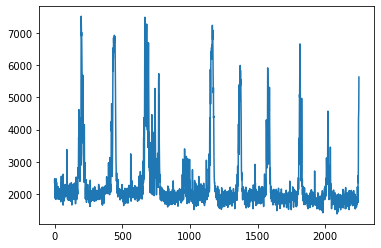

In [11]:
plt.plot(F[1,:])

## plot overall activity

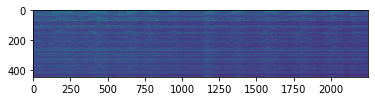

In [12]:
plt.imshow(F)

# Fnue 

array of neuropil floursecent traces (ROI by time)

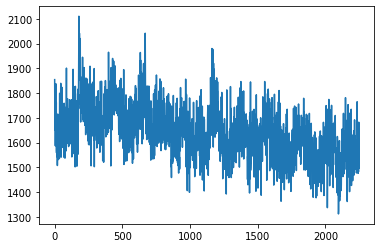

In [13]:
plt.plot(Fneu[1,:])

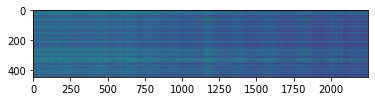

In [14]:
plt.imshow(Fneu)

# Spikes 

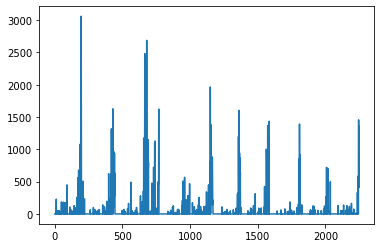

In [15]:
plt.plot(spks[1,:])

In [16]:
spks.shape

(447, 2250)

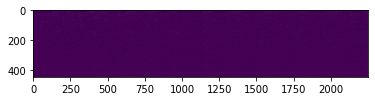

In [17]:
plt.imshow(spks, cmap = 'viridis')

# Overview F, Fneu, spks

(0.0, 8272.10849609375)

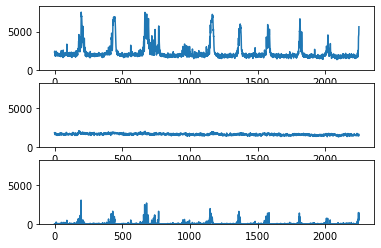

In [30]:
fig, ax = plt.subplots(3)
ax[0].plot(F[1, :])
ax[0].set_ylim(0, max(F[1, :]) + 0.1 * max(F[1, :]))
ax[1].plot(Fneu[1, :])
ax[1].set_ylim(0, max(F[1, :]) + 0.1 * max(F[1, :]))
ax[2].plot(spks[1, :])
ax[2].set_ylim(0, max(F[1, :]) + 0.1 * max(F[1, :]))

# Plot masks

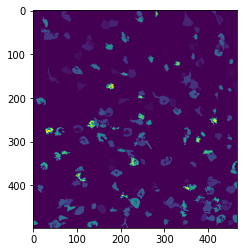

In [21]:
im = np.zeros((ops['Ly'], ops['Lx']))
ncells = stat.shape[0]
truecells = []
for i,e in enumerate(iscell[:,0]):
    if e == 1:
        truecells.append(i)


for n in truecells:
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

plt.imshow(im)
plt.show()

# Print cells based on probability threshold

In [28]:
@IW.interact(threshold = IW.FloatSlider(value =0.5 , min =0, max=1, step = 0.01, continuous_update = True))
def thresholding(threshold):
    im = np.zeros((ops['Ly'], ops['Lx']))
    truecells = []
    for i,e in enumerate(iscell[:,1]):
        if e >= threshold:
            truecells.append(i)

    for n in truecells:
        ypix = stat[n]['ypix'][~stat[n]['overlap']]
        xpix = stat[n]['xpix'][~stat[n]['overlap']]
        im[ypix,xpix] = n+1

    plt.imshow(im)
    plt.show()


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…